0.0 22.000000130514763 10.000000000115449
121134.0377123673 22.84649102649837 10.303466619487835
242268.0754247346 23.622092111704376 10.606968026860613
363402.1131371019 24.321072766134023 10.910503420660348
484536.1508494692 24.936918630597177 11.21407201501097
605670.1885618365 24.999700909297474 11.517673039057058
726804.2262742037 24.999700909297474 11.821305736797115
847938.263986571 24.999700909297474 12.124969366485914
969072.3016989382 24.999700909297474 12.428663200760866
1090206.3394113055 24.999700909297474 12.732386526000141
1211340.3771236727 24.999700909297474 13.036138642117692
1332474.41483604 24.999700909297474 13.339918862222817
1453608.4525484073 24.999700909297474 13.643726512451224
1574742.4902607745 24.999700909297474 13.947560931645853
1695876.5279731418 24.999700909297474 14.251421471074309
1817010.565685509 24.999700909297474 14.555307494017086
1938144.6033978763 24.999700909297474 14.859218375806336
2059278.6411102435 24.999700909297474 15.163153503488559
218

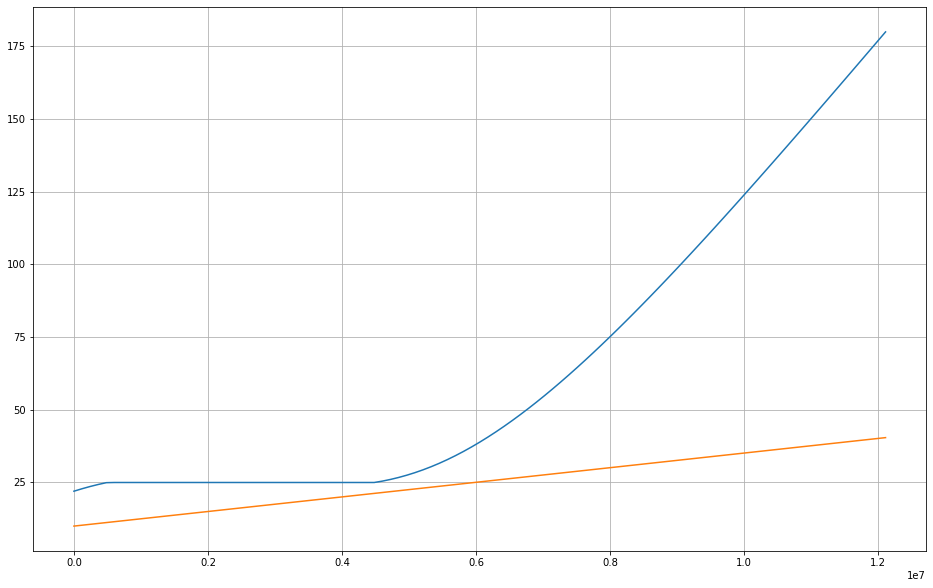

In [1]:
#Расчёт T-Q
import matplotlib.pyplot as pt
import numpy as n
import math as m
import json, CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI as p
# CP.set_config_string(CP.ALTERNATIVE_REFPROP_PATH, 'C:\\maximov\\REFPROP\\')
from scipy.optimize import root

#исходные данные:
G1   = 33.338
G2   = 95.155
T11  = 180
T21  = 10       #В °С
P11  = 6434200  #В Па
P21  = 100000   #В Па
#Qend = 0        #Конечная степень сухости
T12  = 22
CO2  = 'REFPROP::CO2'
H2O  = 'REFPROP::WATER'
O2   = 'REFPROP::Oxygen'
H11  = p('H','T', T11+273.15, 'P', P11, CO2)
H12  = p('H','P', P11, 'T', T12+273.15, CO2)
H21  = p('H','T', T21+273.15, 'P', P21, H2O)


#Разбиение по энтальпии:
s    = 100 #Кол-во шагов
step = (H11-H12)/(s) 


#Нулевые массивы:
t1   = n.zeros(s+1)
t2   = n.zeros(s+1)
Q    = n.zeros(s+1)
F    = n.zeros(s+1)
L    = n.zeros(s+1)


#Противоток:
h11 = H12
h21 = H21
i=0
for i in range(s+1):
    t1[i] = p('T','H', h11, 'P', P11, CO2)-273.15
    t2[i] = p('T','H', h21, 'P', P21, H2O)-273.15    
    h12 = h11 + step
    dQ = G1 * (h12-h11)
    if i < s:
        Q[i+1]=Q[i]+dQ
    h22 = (dQ/G2)+h21
    h11 = h12
    h21 = h22
    print(Q[i],t1[i],t2[i])
DT=t1-t2



#Вывод графика
x  = [Q[i] for i in range(s+1)]  
y1 = [t1[i] for i in (range(s+1))]
y2 = [t2[i] for i in (range(s+1))]
pt.figure(figsize=(16, 10))
pt.plot(x, y1,x, y2)
pt.grid(True)
pt.show()